In [317]:
from keras.preprocessing.image import ImageDataGenerator

In [318]:
import tensorflow as tf
import os

# MODEL BUILDING

Adding The Convolution Layer

In [319]:
import numpy as np
import matplotlib.pyplot as plt

In [320]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [321]:
# Training Datagen
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
# Testing Datagen
test_datagen = ImageDataGenerator(rescale=1/255)

In [322]:
x_train=train_datagen.flow_from_directory('/content/Dataset/training_set',target_size=(64,64), class_mode='categorical',batch_size=900)

Found 15750 images belonging to 9 classes.


In [323]:
x_test=test_datagen.flow_from_directory('/content/Dataset/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [324]:
print("Len x-train : ", len(x_train))

Len x-train :  18


In [325]:
print("Len x-test : ", len(x_test))

Len x-test :  12


In [326]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [327]:
# let img1 be an image with no features
img1 = np.array([np.array([200, 200]), np.array([200, 200])])
img2 = np.array([np.array([200, 200]), np.array([0, 0])])
img3 = np.array([np.array([200, 0]), np.array([200, 0])])
  
kernel_horizontal = np.array([np.array([2, 2]), np.array([-2, -2])])
print(kernel_horizontal, 'is a kernel for detecting horizontal edges')
  
kernel_vertical = np.array([np.array([2, -2]), np.array([2, -2])])
print(kernel_vertical, 'is a kernel for detecting vertical edges')

[[ 2  2]
 [-2 -2]] is a kernel for detecting horizontal edges
[[ 2 -2]
 [ 2 -2]] is a kernel for detecting vertical edges


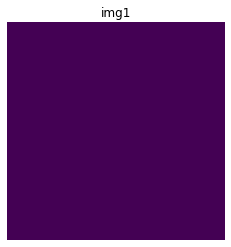

Horizontal edge confidence score: 0
Vertical edge confidence score: 0


In [328]:
def apply_kernel(img, kernel):
    return np.sum(np.multiply(img, kernel))
  
# Visualizing img1
plt.imshow(img1)
plt.axis('off')
plt.title('img1')
plt.show()

# Checking for horizontal and vertical features in image1
print('Horizontal edge confidence score:', apply_kernel(img1, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img1, 
                                            kernel_vertical))

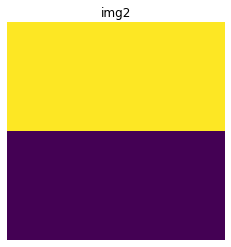

Horizontal edge confidence score: 800
Vertical edge confidence score: 0


In [329]:
# Visualizing img2
plt.imshow(img2)
plt.axis('off')
plt.title('img2')
plt.show()

# Checking for horizontal and vertical features in image2
print('Horizontal edge confidence score:', apply_kernel(img2, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img2, 
                                            kernel_vertical))

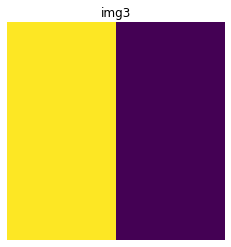

Horizontal edge confidence score: 0
Vertical edge confidence score: 800


In [330]:
# Visualizing img3
plt.imshow(img3)
plt.axis('off')
plt.title('img3')
plt.show()
  
# Checking for horizontal and vertical features in image3
print('Horizontal edge confidence score:', apply_kernel(img3, 
                                            kernel_horizontal))
print('Vertical edge confidence score:', apply_kernel(img3, 
                                            kernel_vertical))

In [331]:
# The Class Indices in Training Dataset
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [332]:
from tensorflow.keras.models import Sequential

In [333]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [334]:
from keras import layers

# Creating Model

In [335]:
model=Sequential()

# Adding Layers

In [336]:

model.add(Conv2D(33,(3,3),input_shape=(64,64,1), activation='relu'))

model.add(Flatten())

# 1st hidden layer

In [337]:
model.add(Dense(400,activation='relu'))

# 2nd hidden layer

In [338]:
model.add(Dense(200,activation='relu'))

# 3rd hidden layer

In [339]:
model.add(Dense(100,activation='relu'))

# output layer

In [340]:
model.add(Dense(9,activation='softmax'))

# Compile The Model

In [341]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fit The Model

In [342]:
model.fit_generator(x_train,steps_per_epoch=30,epochs=10,validation_data=x_test,validation_steps=50)

C:\Users\Harini\AppData\Local\Temp/ipykernel_13792/4028576845.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=30,epochs=10,validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 107s 3s/step - loss: 1.2575 - accuracy: 0.5933 - val_loss: 0.4059 - val_accuracy: 0.9040


In [343]:
model.fit(x_train,epochs=10,validation_data=x_test,verbose=1)

Epoch 1/10
18/18 [==============================] - 53s 3s/step - loss: 0.2315 - accuracy: 0.9316 - val_loss: 0.2413 - val_accuracy: 0.9338
Epoch 2/10
18/18 [==============================] - 52s 3s/step - loss: 0.0777 - accuracy: 0.9781 - val_loss: 0.2032 - val_accuracy: 0.9556
Epoch 3/10
18/18 [==============================] - 53s 3s/step - loss: 0.0362 - accuracy: 0.9909 - val_loss: 0.1937 - val_accuracy: 0.9707
Epoch 4/10
18/18 [==============================] - 53s 3s/step - loss: 0.0213 - accuracy: 0.9950 - val_loss: 0.1634 - val_accuracy: 0.9742
Epoch 5/10
18/18 [==============================] - 53s 3s/step - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.1722 - val_accuracy: 0.9764
Epoch 6/10
18/18 [==============================] - 51s 3s/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.1862 - val_accuracy: 0.9764
Epoch 7/10
18/18 [==============================] - 52s 3s/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.2045 - val_accuracy: 0.9773
Epoch 8/10
18/18 [==

# Save The Model

In [344]:
model.save('aslpng1.h5')